Building a basic Prediction LSTM model on the TIMESERIES Data

In [1]:
####Change directory
import os
os.chdir('G:\9_Residency_APR\Lab and Project\LAb\Internal')

In [2]:
import pandas as pd
df = pd.read_csv('daily-minimum-temperatures-in-me.csv')

In [3]:
df.head()

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
Date           3650 non-null object
Temperature    3650 non-null float64
dtypes: float64(1), object(1)
memory usage: 57.1+ KB


In [5]:
df.set_index('Date',inplace = True)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,3650.0,11.177753,4.071837,0.0,8.3,11.0,14.0,26.3


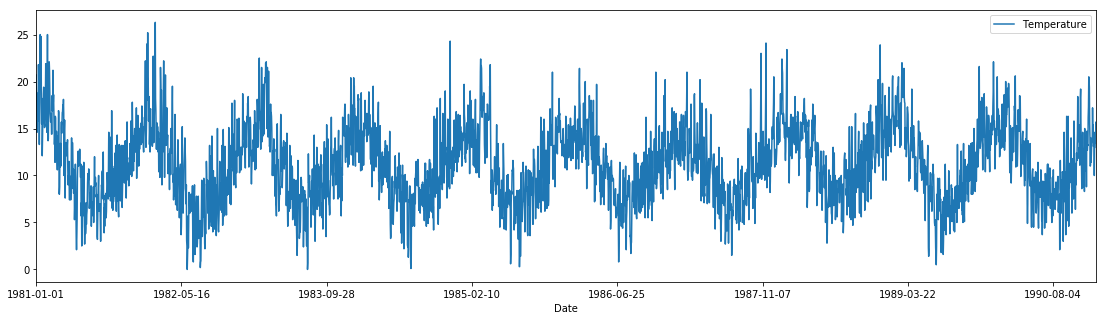

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot(figsize =(19,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009BBF0F0>]],
      dtype=object)

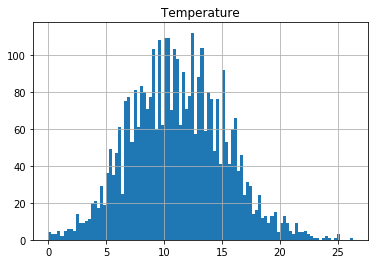

In [8]:
df.hist(bins=100)

In [9]:
df['Temperature'].min()

0.0

In [10]:
df['Temperature'].max()

26.3

In [11]:
train = df.iloc[:int(len(df)*0.75)]
test = df.iloc[int(len(df)*0.75):]

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [13]:
import numpy as np
def create_seq_data(data, lookback=1):
  X, y = list(), list()
  
  for day in range((len(data)-lookback)):
    X.append(data[day: day+lookback, 0])
    y.append(data[day+lookback, 0])
  return np.array(X), np.array(y)

In [14]:
X_train,y_train = create_seq_data(train)

In [15]:
X_test,y_test = create_seq_data(test)

In [16]:
#The input of the LSTM is always is a 3D array. (batch_size, time_steps,seq_len)
print('X_train length:',len(X_train))
print('X_test length:',len(X_test))
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

X_train length: 2736
X_test length: 912


In [17]:
#Initialize model
import tensorflow as tf
tf.keras.backend.clear_session()

In [18]:
model = tf.keras.Sequential()

batch_size = 1
look_back =1
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(10,batch_input_shape = (batch_size,look_back,1),stateful = True))
#model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

#model.output
model.layers

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
model.compile(loss = 'mean_squared_error', optimizer='adam')

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 10)                   480       
_________________________________________________________________
dense (Dense)                (1, 1)                    11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
batch_size = 1
epochs = 50
model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size, verbose = 2)

Epoch 1/50
2736/2736 - 4s - loss: 0.0098
Epoch 2/50
2736/2736 - 4s - loss: 0.0099
Epoch 3/50
2736/2736 - 4s - loss: 0.0099
Epoch 4/50
2736/2736 - 4s - loss: 0.0099
Epoch 5/50
2736/2736 - 4s - loss: 0.0099
Epoch 6/50
2736/2736 - 4s - loss: 0.0099
Epoch 7/50
2736/2736 - 4s - loss: 0.0099
Epoch 8/50
2736/2736 - 4s - loss: 0.0099
Epoch 9/50
2736/2736 - 5s - loss: 0.0099
Epoch 10/50
2736/2736 - 5s - loss: 0.0099
Epoch 11/50
2736/2736 - 4s - loss: 0.0099
Epoch 12/50
2736/2736 - 4s - loss: 0.0098
Epoch 13/50
2736/2736 - 4s - loss: 0.0099
Epoch 14/50
2736/2736 - 5s - loss: 0.0098
Epoch 15/50
2736/2736 - 4s - loss: 0.0098
Epoch 16/50
2736/2736 - 4s - loss: 0.0098
Epoch 17/50
2736/2736 - 4s - loss: 0.0099
Epoch 18/50
2736/2736 - 4s - loss: 0.0098
Epoch 19/50
2736/2736 - 4s - loss: 0.0099
Epoch 20/50
2736/2736 - 4s - loss: 0.0098
Epoch 21/50
2736/2736 - 4s - loss: 0.0099
Epoch 22/50
2736/2736 - 4s - loss: 0.0098
Epoch 23/50
2736/2736 - 4s - loss: 0.0098
Epoch 24/50
2736/2736 - 4s - loss: 0.0099
E

In [23]:
train_pred = model.predict(X_train,batch_size = batch_size,verbose = 2)

2736/2736 - 1s


In [24]:
model.reset_states()

In [25]:
test_pred = model.predict(X_test,batch_size = batch_size,verbose = 2)

912/912 - 0s


In [26]:
train_true_pred_labels = scaler.inverse_transform(train_pred)
train_true_labels = scaler.inverse_transform([y_train])
train_true_labels = train_true_labels.T

In [27]:
test_true_pred_labels = scaler.inverse_transform(test_pred)
test_true_labels = scaler.inverse_transform([y_test])
test_true_labels = test_true_labels.T

In [28]:
from sklearn.metrics import mean_squared_error
RMSE_train = np.sqrt(mean_squared_error(train_true_labels, train_true_pred_labels))
print("train RMSE = ", RMSE_train)

train RMSE =  2.6012690719692517


In [29]:
from sklearn.metrics import mean_squared_error
RMSE_test = np.sqrt(mean_squared_error(test_true_labels,test_true_pred_labels))
print('test rmse :',RMSE_test)

test rmse : 2.524798419520022
